In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy import sparse
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
nmf_input = sc.read_h5ad("analcancer_cNMF\s13_cNMF_r40_k6-20\cnmf_tmp\s13_cNMF_r40_k6-20.norm_counts.h5ad")

In [8]:
nmf_input_df = pd.DataFrame(
    nmf_input.X.toarray() if hasattr(nmf_input.X, 'toarray') else nmf_input.X,
    index=nmf_input.obs_names,
    columns=nmf_input.var_names
)
nmf_input_df.head()

,PLEKHN1,ISG15,RNF223,TNFRSF18,TNFRSF4,SCNN1D,MXRA8,VWA1,ATAD3C,CALML6,...,RAB39B,IL9R,MT-ND1,MT-ND3,MT-ND6,BCAN,ADH4,SFTPC,TMEM155,OPN4
S13_AAACAAGCACCTTTGGAACGGGAA-1_1_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.230586,0.0,0.0,0.0,0.0,0.0
S13_AAACAAGCACTAGTAGAACGGGAA-1_1_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.039006,0.000000,0.0,0.0,0.0,0.0,0.0
S13_AAACAAGCACTTTACAAACGGGAA-1_1_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.656481,0.000000,0.922342,0.0,0.0,0.0,0.0,0.0
S13_AAACAAGCATATAGGTAACGGGAA-1_1_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.230586,0.0,0.0,0.0,0.0,0.0
S13_AAACAAGCATCATGTCAACGGGAA-1_1_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


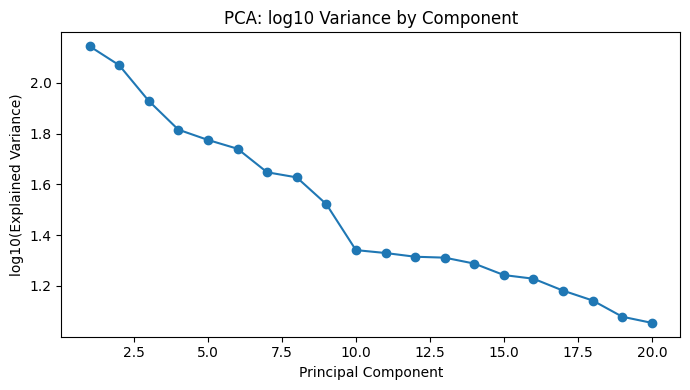

In [11]:
# nmf_input_df: cells x genes (your DataFrame from the AnnData)
X = nmf_input_df.values  # PCA expects samples x features (cells x genes)

# Choose a reasonable number of components (cap at 50 for readability)
n_samples, n_features = X.shape
n_components = 20

# Fit PCA (centers features by default)
pca = PCA(n_components=n_components, svd_solver='auto', random_state=0)
pca.fit(X)

# Prepare data for the plot
pc_idx = np.arange(1, n_components + 1)
log_var = np.log10(pca.explained_variance_)  # explained_variance_ is the variance per PC

# Plot: PC vs log10(explained variance)
plt.figure(figsize=(7, 4))
plt.plot(pc_idx, log_var, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('log10(Explained Variance)')
plt.title('PCA: log10 Variance by Component')
plt.tight_layout()
plt.show()


In [10]:
n_components

50